## SI 670 Applied Machine Learning, Homework 7: Deep Learning

For this assignment, question 1 is worth 50 points, and question 2 is worth 40 points, for a total of 90 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file AND corresponding **HTML** file to the Canvas site.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.

### Put your name here: Martin Zanaj

### Put your uniquename here: mzanaj

### Question 1 Comparing ML with DL (50 points)

In this question, we are still exploring classifying the IMDB movie data set as we did in the lab.   You will use the different classifiers you learned in this course: (1) LinearSVC; (2) RandomForestClassifier; (3) Deep learning. 

### Preprocessing

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)

# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Question 1(a) (10 points)
Please use LinearSVC to train the model and return the mean accuracy on the given test data and labels. You can use the default parameteers in LinearSVC.

In [4]:
def answer_one_a():
    from sklearn.svm import LinearSVC
    from sklearn.metrics import accuracy_score
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import MinMaxScaler

    #Pipeline
    clf = Pipeline([('scalar',MinMaxScaler()),('LinerSVC',LinearSVC())])
    
    #Fit
    clf.fit(x_train, y_train)
    
    #Prediction
    svc_preidction= clf.predict(x_test)

    #Accuracy Score
    test_score= accuracy_score(svc_preidction,y_test)

    #Score (same as accuracy)
    test_score = clf.score(x_test, y_test)
    
    return test_score

answer_one_a()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8356

### Question 1(b) (10 points)
Please use RandomForestClassifier (with random_state = 0) to train the model and return the mean accuracy on the given test data and labels. 

In [5]:
def answer_one_b():
    from sklearn.ensemble import RandomForestClassifier
    
    #Random Forest
    clf = RandomForestClassifier(random_state=0)

    #Fit
    clf.fit(x_train, y_train)

    #Test score
    test_score = clf.score(x_test, y_test)
  
    return test_score
answer_one_b()

0.84384

### Question 1(c) (20 points)

Please use the below architecture of the dense layers to design your model:
one intermediate layers with 32 hidden units, 
and a second layer which will output the scalar prediction regarding the sentiment of the current review. 

The intermediate layer will use `relu` as its "activation function", 
and the final layer will use a sigmoid activation so as to output a probability 
(a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive). 
A `relu` (rectified linear unit) is a function meant to zero-out negative values, 
while a sigmoid "squashes" arbitrary values into the `[0, 1]` interval, thus outputting something that can be interpreted as a probability.

We configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function as we did in the lab. Note that we will 
also monitor accuracy during training.

For model fitting, we train our model for 4 epochs (4 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples.

Please return the testing accuracy. 

In [30]:
def answer_one_c():
    from keras import models
    from keras import layers

    #write your code here
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
    return results

answer_one_c()

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.4101 - accuracy: 0.8314
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2445 - accuracy: 0.9134
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1959 - accuracy: 0.9305
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2940 - accuracy: 0.8827


[0.29404348134994507, 0.8826799988746643]

### Question 1(d) Open Question (10 points)
**Can you conclude that deep learning is better than the classic ML models on this task?**


As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data never-seen-before. Hence, it makes sense to check if we are indeed overfitting (or underfitting). 

I have run the model on a validation set (results below), so as to check for overfitting. It is apparent form the training & validation train/test scores that around epoch 3 & 4 (best test score) there is no overfitting. This represents that our model is not overfitting, nor underfitting.  In comparison to the other models, we are indeed getting a better accuracy scores. Also, we could make additional adjustments to out model architecture that could indeed better the oveall performance. Hence, I would conclude that **Deep Learning is better** on the basis that the accuracy is higher & that there is no apparent overfitting.  

**If so, what do you think that helps Deep Learning perform better?**

* Deep learning networks can learn very complicated relationships. They can form a much deeper understanding of a sequence and its context, compared to other algorithms  (random forest/linearSVC).

* Perhaps, in this setting the features are learned my the machine, rather than forced by the intuition of the desginer (me). Hence, this lack  of imposition allows for the true structures to emerge. 

* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems which allows to capture relationships that can be missed by other models techniques. 

* Can use different network structures to improve performance & add featuers such as embeddings. 


In [17]:
from keras import models
from keras import layers
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#write your code here
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/10
30/30 [==============================] - 2s 53ms/step - loss: 0.4857 - accuracy: 0.7916 - val_loss: 0.3656 - val_accuracy: 0.8670
Epoch 2/10
30/30 [==============================] - 1s 40ms/step - loss: 0.2919 - accuracy: 0.9043 - val_loss: 0.3042 - val_accuracy: 0.8869
Epoch 3/10
30/30 [==============================] - 1s 40ms/step - loss: 0.2218 - accuracy: 0.9301 - val_loss: 0.2784 - val_accuracy: 0.8916
Epoch 4/10
30/30 [==============================] - 1s 40ms/step - loss: 0.1810 - accuracy: 0.9427 - val_loss: 0.2731 - val_accuracy: 0.8907
Epoch 5/10
30/30 [==============================] - 1s 40ms/step - loss: 0.1513 - accuracy: 0.9529 - val_loss: 0.2767 - val_accuracy: 0.8881
Epoch 6/10
30/30 [==============================] - 1s 39ms/step - loss: 0.1249 - accuracy: 0.9641 - val_loss: 0.2839 - val_accuracy: 0.8861
Epoch 7/10
30/30 [==============================] - 1s 40ms/step - loss: 0.1105 - accuracy: 0.9683 - val_loss: 0.3109 - val_accuracy: 0.8794
Epoch 8/10
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

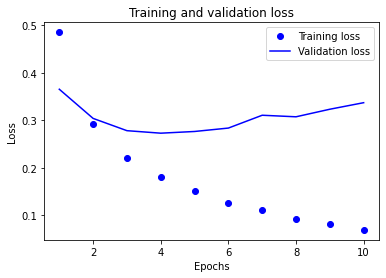

[0.3656480610370636,
 0.30420365929603577,
 0.27836844325065613,
 0.2730787396430969,
 0.2766709327697754,
 0.2838616669178009,
 0.31086641550064087,
 0.30760645866394043,
 0.3235381245613098,
 0.3373151123523712]

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
val_loss

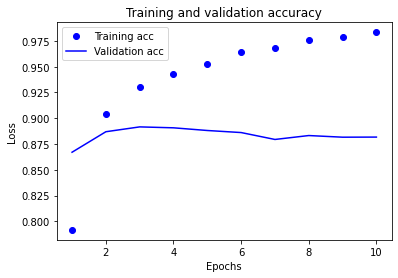

range(1, 11)
[0.8669999837875366, 0.886900007724762, 0.8916000127792358, 0.8906999826431274, 0.8881000280380249, 0.8860999941825867, 0.8794000148773193, 0.8831999897956848, 0.881600022315979, 0.8816999793052673]


In [19]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
print(epochs)
print(val_acc)

## Question 2 Hyper-parameteer tunning in DL (40 points)

We have shown you how to tune parameters such as training epoch in the lab. 

In this question, we are exploring the hyper-parameteer tuning in deep learning from the perspective of the size of the network. 

First, we divide some part of training data into valiadation data. 

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Question 2(a): (30 points)

Follow the IMDB classification question in Question 1, we hope you design and test different neural network. You shall vary the first intermediate layer with [3, 6, 9, 12] hidden units, and the second intermediate layer with [2, 4, 6, 8] hidden units. 

The last layer which will output the scalar prediction regarding the sentiment of the current review. 

Apply the different models onto the valiadation set and return the best model with highest accuracy on the valiadation. You should three numbers, which represent the best model's number of hideen units in first, second intermediate layer, and the best accuracy. 

Fit the model by using the default setting in 1(c). (epochs = 4, batch_sze = 512, optimizer = rmsprop, loss = binary_crossentropy, metrics = 'accuracy')

In [35]:
def answer_two_a():
    from keras import models
    from keras import layers

    best_first, best_second, best_res = 0, 0, 0
    for first_layer in [3, 6, 9, 12]:
        for second_layer in [2, 4, 6, 8]:
          #Initialize sequential model 
          model = models.Sequential()

          #Layer 1
          model.add(layers.Dense(first_layer, activation='relu', input_shape=(10000,)))

          #Layer 2 
          model.add(layers.Dense(second_layer, activation='relu', input_shape=(10000,)))
            
          #Prediction Layer
          model.add(layers.Dense(1, activation='sigmoid'))
 
          #Compile Mode
          model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

          #Fit
          model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)

          # Testing error
          results = model.evaluate(x_val, y_val)
          
          if(results[1]>best_res):
            best_first, best_second, best_res =first_layer,second_layer,results[1]
      
    return best_first, best_second, best_res

answer_two_a()

Epoch 1/4
30/30 [==============================] - 1s 23ms/step - loss: 0.6428 - accuracy: 0.6575
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.5675 - accuracy: 0.7660
Epoch 3/4
30/30 [==============================] - 1s 23ms/step - loss: 0.5216 - accuracy: 0.8194
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.8172
Epoch 1/4
30/30 [==============================] - 1s 23ms/step - loss: 0.6495 - accuracy: 0.6121
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.5777 - accuracy: 0.7394
Epoch 3/4
30/30 [==============================] - 1s 22ms/step - loss: 0.5326 - accuracy: 0.8027
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.5079 - accuracy: 0.8071
Epoch 1/4
30/30 [==============================] - 1s 24ms/step - loss: 0.6007 - accuracy: 0.7437
Epoch 2/4
30/30 [==============================] - 1s 23ms/step - loss: 0.4579 - accuracy: 0.8701
Epoch 3/4
30/30 [=

(9, 8, 0.8914999961853027)

### Question 2(b): (10 points)

**According to the performance we observed for the models. Which design is best for this task?**

After taking in account the different models performances, it looks that the best model is the Deep learning model with two layers; where the **first layer is 9 & the second layer is 8** . I re-ran the model on the entire dataset. The accuracy score  on the test data is indeed better (slightly) even than the models in question 1. 

**What take-away do you get from this question? Does it mean larger network improve the model's performance?**

More flexibility does not necessarily mean that we will get a better accuracy on the testing data. Instead the **right degree of flexibility**(largness) is crucial so as to make use of the power of deep learning and at the same time ensure that that we are  putting restrictions to avoid over-fitting. 

For example, below is the list of accuracy values from a previous modeling attempt. It is noticable that when the network is with configuration 3,2 (first) the accuracy is 0.88; on the other hand, when the network is with configuration 12,6 (one-to last), the accuracy is almost is 0.87. Hence, a larger network does not necessarily mean a better accuracy. 

[[3, 2, 0.8824999928474426],

  [3, 4, 0.8672999739646912],

  [3, 6, 0.8754000067710876],

  [3, 8, 0.880299985408783],

  [6, 2, 0.8421000242233276],

  [6, 4, 0.8616999983787537],

  [6, 6, 0.8865000009536743],

  [6, 8, 0.8906999826431274],

  [9, 2, 0.8888000249862671],

  [9, 4, 0.8871999979019165],

  [9, 6, 0.8881000280380249],

  [9, 8, 0.8878999948501587],

  [12, 2, 0.8889999985694885],

  [12, 4, 0.8924000263214111],

  [12, 6, 0.8740000128746033],

  [12, 8, 0.8880000114440918]])



In [5]:
from keras import models
from keras import layers
#Initialize sequential model 
model = models.Sequential()

#Layer 1
model.add(layers.Dense(9, activation='relu', input_shape=(10000,)))

#Layer 2 
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
            
#Prediction Layer
model.add(layers.Dense(1, activation='sigmoid'))

#Compile Mode
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

#Fit
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Testing error
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.5156 - accuracy: 0.7934
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.3154 - accuracy: 0.9048
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2336 - accuracy: 0.9211
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2873 - accuracy: 0.8856


[0.2872650921344757, 0.8855999708175659]

In [8]:
def answer_two_a():
    from keras import models
    from keras import layers

    best_first, best_second, best_res = 0, 0, 0
    thy=[]
    for first_layer in [3, 6, 9, 12]:
        for second_layer in [2, 4, 6, 8]:
          #Initialize sequential model 
          model = models.Sequential()

          #Layer 1
          model.add(layers.Dense(first_layer, activation='relu', input_shape=(10000,)))

          #Layer 2 
          model.add(layers.Dense(second_layer, activation='relu', input_shape=(10000,)))
            
          #Prediction Layer
          model.add(layers.Dense(1, activation='sigmoid'))
 
          #Compile Mode
          model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

          #Fit
          model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)

          # Testing error
          results = model.evaluate(x_val, y_val)
          a=[first_layer,second_layer, results[1]]
          thy.append(a)
          if(results[1]>best_res):
            best_first, best_second, best_res =first_layer,second_layer,results[1]
      
    return best_first, best_second, best_res, thy

answer_two_a()

Epoch 1/4
30/30 [==============================] - 1s 22ms/step - loss: 0.6152 - accuracy: 0.7161
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.5108 - accuracy: 0.8439
Epoch 3/4
30/30 [==============================] - 1s 22ms/step - loss: 0.4464 - accuracy: 0.8893
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.4043 - accuracy: 0.8825
Epoch 1/4
30/30 [==============================] - 1s 23ms/step - loss: 0.6134 - accuracy: 0.6562
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.5210 - accuracy: 0.8014
Epoch 3/4
30/30 [==============================] - 1s 22ms/step - loss: 0.4740 - accuracy: 0.8605
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.4737 - accuracy: 0.8673
Epoch 1/4
30/30 [==============================] - 1s 22ms/step - loss: 0.6315 - accuracy: 0.7326
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.4993 - accuracy: 0.8631
Epoch 3/4
30/30 [=

(12,
 4,
 0.8924000263214111,
 [[3, 2, 0.8824999928474426],
  [3, 4, 0.8672999739646912],
  [3, 6, 0.8754000067710876],
  [3, 8, 0.880299985408783],
  [6, 2, 0.8421000242233276],
  [6, 4, 0.8616999983787537],
  [6, 6, 0.8865000009536743],
  [6, 8, 0.8906999826431274],
  [9, 2, 0.8888000249862671],
  [9, 4, 0.8871999979019165],
  [9, 6, 0.8881000280380249],
  [9, 8, 0.8878999948501587],
  [12, 2, 0.8889999985694885],
  [12, 4, 0.8924000263214111],
  [12, 6, 0.8740000128746033],
  [12, 8, 0.8880000114440918]])